In [22]:
import sys, importlib
# If running in VirtualBox image.
sys.path.append('/home/chihchiu/git/myawesomeproject')
# If running in Docker.
sys.path.append('/workspace/external/myawesomeproject')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from analysis.notebook import notebook_util as util
importlib.reload(util);
ac = util.CreateCollection();
util.ReloadAllModulesInCollection(ac)

[analysis]
    -- sentiment
    [trading]
        -- market_generation
        [simulated]
            -- market_generation
            -- strategy_evaluation
        [strategy]
            -- single_stock_simple_strategies
        -- strategy_evaluation_lib


In [18]:
sim = ac.analysis.trading.simulated

In [20]:
normalized_return_rates = sim.strategy_evaluation.SingleStockStrategyEvaluation.EvaluateUsingFreeMarket(
  ac.analysis.trading.strategy.single_stock_simple_strategies.BuyThenHoldStrategy,
  num_simulations=1000)

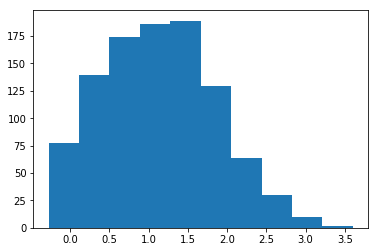

In [21]:
plt.hist(normalized_return_rates)
plt.show()

In [23]:
pd.DataFrame(normalized_return_rates).describe()

,0
count,1000.000000
mean,1.137066
std,0.724468
min,-0.273973
25%,0.574314
50%,1.137128
75%,1.635749
max,3.603362


In [ ]:
## OLD STYLE

In [31]:
import datetime
market_start = datetime.datetime(2010, 1, 1)
market_end = datetime.datetime(2016, 12, 31)
market = ac.analysis.trading.simulated_market_generation.CreateFreeFluctuatingMarket(
    start_datetime=market_start,
    end_datetime=market_end,
    init_value=1000,
    fluctuation_center=5,
    fluctuation_strength=150)

In [29]:
market.GetStockMetadata('STOCK_0').expected_overall_return_rate

STOCK_0


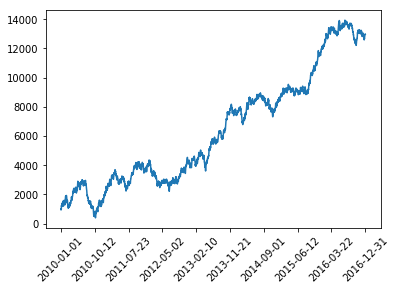

STOCK_1


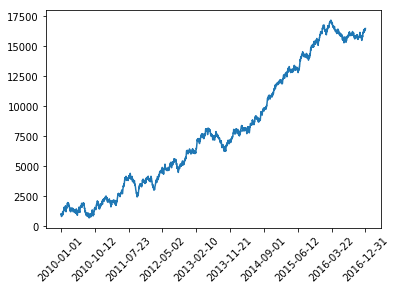

STOCK_2


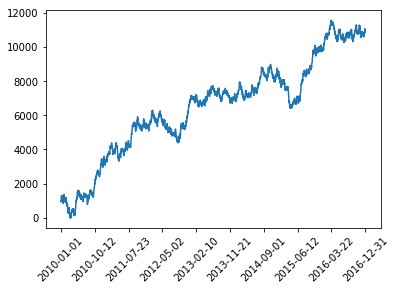

STOCK_3


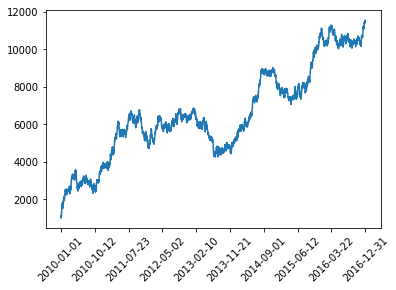

STOCK_4


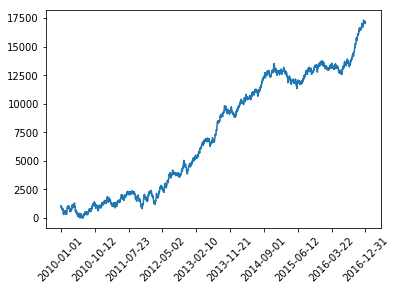

STOCK_5


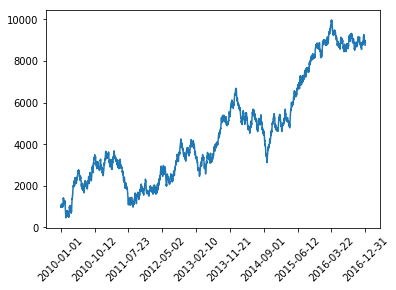

STOCK_6


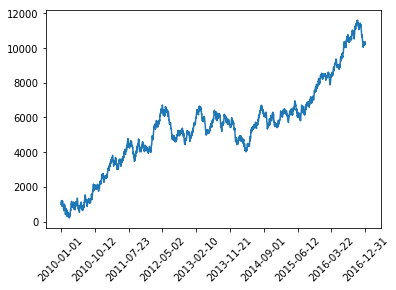

STOCK_7


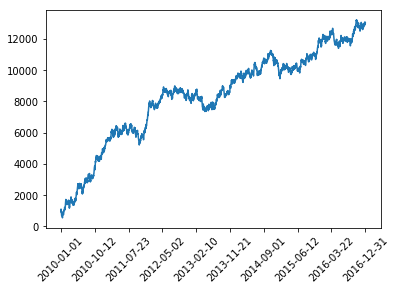

STOCK_8


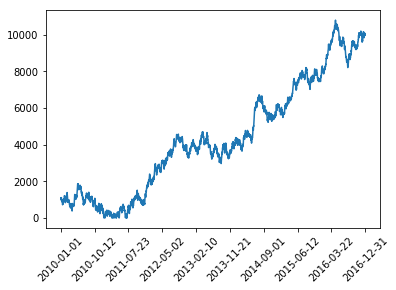

STOCK_9


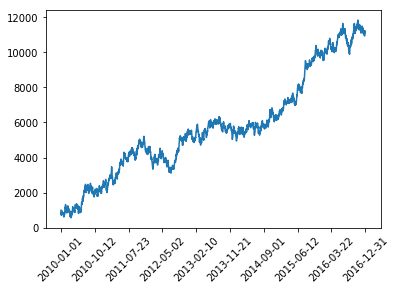

In [32]:
market.PlotAllSymbols()

In [5]:
data_market = util.CreateMarketFromData()

TSLA


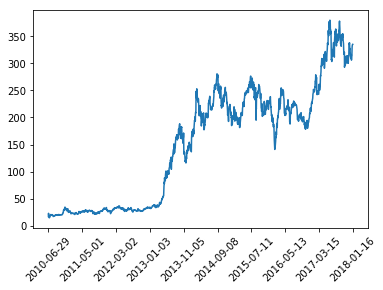

FB


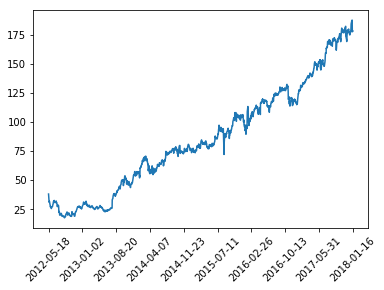

AAPL


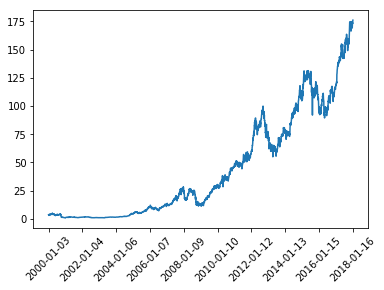

GOOG


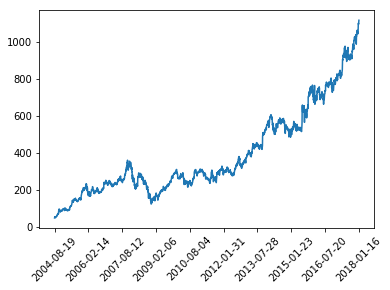

AMZN


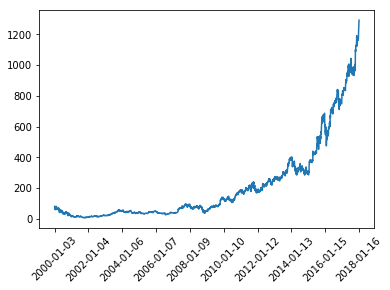

SIVR


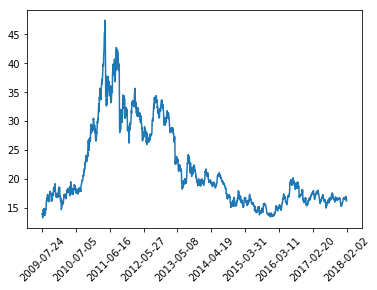

MSFT


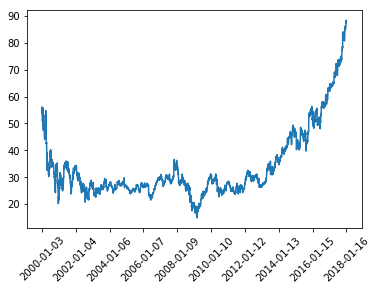

In [6]:
data_market.PlotAllSymbols()

In [8]:
use_symbol = 'STOCK_0'

In [14]:
%%capture
no_action_strategy = ac.analysis.trading.strategy.single_stock_simple_strategies.BuyThenHoldStrategy(use_symbol)

initial_fund = float(100000)
report = ac.analysis.trading.strategy_evaluation.EvaluateStrategy(
    market, no_action_strategy, market_start, market_end, initial_fund)
#value_ts = report.GetTotalValueTimeseries()
final_fund = report.GetFinalTotalValue()
return_rate = final_fund/initial_fund - 1

In [15]:
return_rate

24.115003678632085

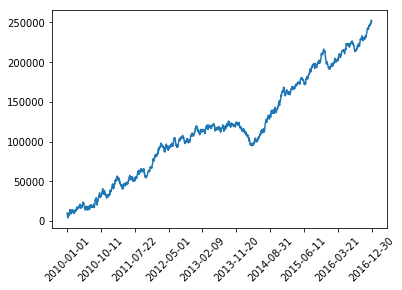

In [13]:
value_ts.Plot()

In [9]:
%%capture
random_action_strategy = single_stock_simple_strategies.RandomStrategy(use_symbol)

fund_random = float(10000)
report_random = strategy_evaluation_lib.EvaluateStrategy(market, random_action_strategy, market_start, market_end, fund_random)
value_ts_random = report_random.GetTotalValueTimeseries()

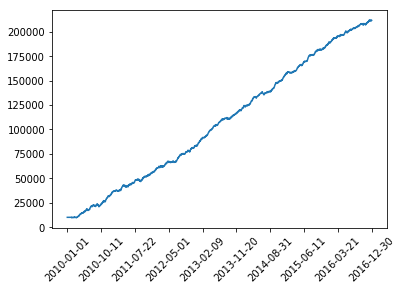

In [10]:
value_ts_random.Plot()

In [11]:
%%capture
strategy = single_stock_simple_strategies.PriceDerivativeWeekTraderStrategy(use_symbol)

fund = float(10000)
report = strategy_evaluation_lib.EvaluateStrategy(market, strategy, market_start, market_end, fund)
value_ts = report.GetTotalValueTimeseries()

AttributeError: module 'analysis.trading.strategy.single_stock_simple_strategies' has no attribute 'PriceDerivativeWeekTraderStrategy'

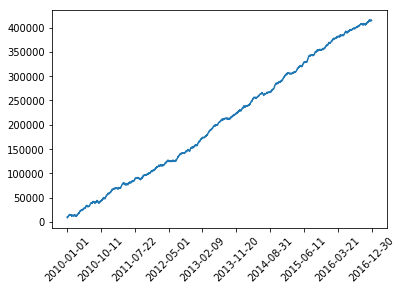

In [12]:
value_ts.Plot()

In [13]:
%%capture
detailed_report = report.GetDetailedReport()

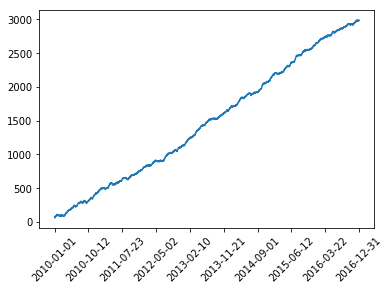

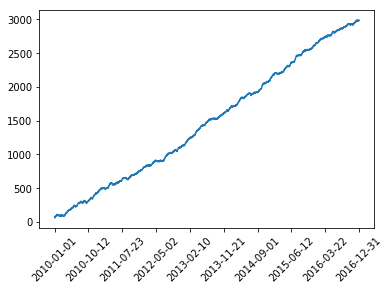

In [14]:
stock_timeseries = market.GetPriceTimeSeries(use_symbol)
stock_timeseries.Plot()
stock_timeseries.RestrictToRangeByDatetime(market_start, market_end).Plot()

In [15]:
stock_timeseries = market.GetPriceTimeSeries('AAPL')
stock_timeseries.Plot()

MarketInfoQueryException: no info found for "AAPL"

In [ ]:
stock_timeseries = market.GetPriceTimeSeries('SIVR')
stock_timeseries.Plot()

In [11]:
2^3

1

In [12]:
import math

In [13]:
math.pow(2,3)

8.0

In [14]:
import sys

In [16]:
import sys
modulenames = set(sys.modules)&set(globals())
allmodules = [sys.modules[name] for name in modulenames]

In [17]:
allmodules

[<module 'sys' (built-in)>,
 <module 'importlib' from '/usr/lib/python3.6/importlib/__init__.py'>,
 <module 'math' from '/usr/lib/python3.6/lib-dynload/math.cpython-36m-x86_64-linux-gnu.so'>,
 <module 'datetime' from '/usr/lib/python3.6/datetime.py'>]